In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import os
import glob
import cv2
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, Dropout
from sklearn.model_selection import train_test_split

In [3]:
images_dataset = []

for directory_path in glob.glob('dataset/data_for_training_and_testing/subset/image'):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 1)
        images_dataset.append(img)
images_dataset

[array([[[128, 140, 164],
         [127, 139, 163],
         [122, 136, 159],
         ...,
         [ 34,  45,  37],
         [ 38,  49,  41],
         [ 45,  56,  48]],
 
        [[118, 130, 154],
         [123, 136, 158],
         [120, 132, 156],
         ...,
         [ 35,  46,  38],
         [ 33,  44,  36],
         [ 32,  43,  35]],
 
        [[127, 138, 160],
         [119, 130, 150],
         [125, 136, 158],
         ...,
         [ 41,  52,  42],
         [ 38,  49,  39],
         [ 37,  48,  38]],
 
        ...,
 
        [[ 62,  69,  62],
         [ 64,  71,  64],
         [ 58,  64,  59],
         ...,
         [ 23,  28,  27],
         [ 26,  31,  30],
         [ 19,  23,  24]],
 
        [[ 70,  74,  69],
         [ 62,  66,  61],
         [ 67,  71,  66],
         ...,
         [ 32,  36,  30],
         [ 38,  42,  37],
         [ 31,  35,  30]],
 
        [[ 66,  70,  65],
         [ 65,  69,  64],
         [ 56,  60,  55],
         ...,
         [ 44,  48,  37],
  

In [4]:
images_dataset = np.array(images_dataset)
images_dataset

array([[[[128, 140, 164],
         [127, 139, 163],
         [122, 136, 159],
         ...,
         [ 34,  45,  37],
         [ 38,  49,  41],
         [ 45,  56,  48]],

        [[118, 130, 154],
         [123, 136, 158],
         [120, 132, 156],
         ...,
         [ 35,  46,  38],
         [ 33,  44,  36],
         [ 32,  43,  35]],

        [[127, 138, 160],
         [119, 130, 150],
         [125, 136, 158],
         ...,
         [ 41,  52,  42],
         [ 38,  49,  39],
         [ 37,  48,  38]],

        ...,

        [[ 62,  69,  62],
         [ 64,  71,  64],
         [ 58,  64,  59],
         ...,
         [ 23,  28,  27],
         [ 26,  31,  30],
         [ 19,  23,  24]],

        [[ 70,  74,  69],
         [ 62,  66,  61],
         [ 67,  71,  66],
         ...,
         [ 32,  36,  30],
         [ 38,  42,  37],
         [ 31,  35,  30]],

        [[ 66,  70,  65],
         [ 65,  69,  64],
         [ 56,  60,  55],
         ...,
         [ 44,  48,  37],
        

In [5]:
masks_dataset = []

for directory_path in glob.glob('dataset/data_for_training_and_testing/subset/mask'):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 1)
        masks_dataset.append(mask)
masks_dataset

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        ...,
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
  

In [6]:
masks_dataset = np.array(masks_dataset)
masks_dataset

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        ...,

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
        

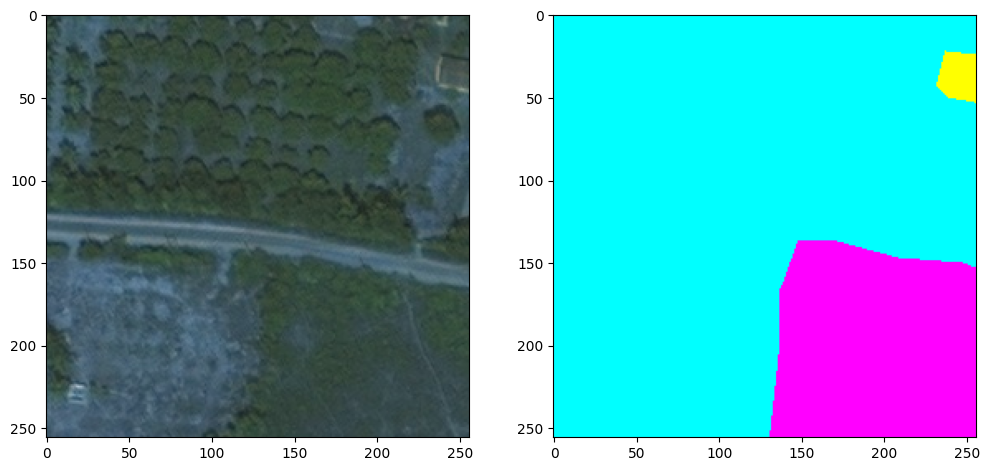

In [13]:
image_number = random.randint(0, len(images_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(images_dataset[image_number], (256, 256, 3)))
plt.subplot(122)
plt.imshow(np.reshape(masks_dataset[image_number], (256, 256, 3)))
plt.show()

In [14]:
urban_land = [0, 255, 255]
agriculture_land = [255, 255, 0]
rangeland = [255, 0, 255]
forest_land = [0, 255, 0]
water = [0, 0, 255]
barren_land = [255, 255, 255]
unknown = [0, 0, 0]

In [15]:
def rgb_to_2D_label(label):
    
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == urban_land, axis = -1)] = 0
    label_seg [np.all(label == agriculture_land, axis = -1)] = 1
    label_seg [np.all(label == rangeland, axis = -1)] = 2
    label_seg [np.all(label == forest_land, axis = -1)] = 3
    label_seg [np.all(label == water, axis = -1)] = 4
    label_seg [np.all(label == barren_land, axis = -1)] = 5
    label_seg [np.all(label == unknown, axis = -1)] = 6
    
    label_seg = label_seg[:, :, 0]
    return label_seg

In [16]:
labels = []
for i in range(masks_dataset.shape[0]):
    label = rgb_to_2D_label(masks_dataset[i])
    labels.append(label)    

labels = np.array(labels)
labels

array([[[5, 5, 5, ..., 3, 3, 3],
        [5, 5, 5, ..., 3, 3, 3],
        [5, 5, 5, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       ...,

       [[5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       [[5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [2, 2, 2, ..., 

In [17]:
labels = np.expand_dims(labels, axis=3)
labels

array([[[[5],
         [5],
         [5],
         ...,
         [3],
         [3],
         [3]],

        [[5],
         [5],
         [5],
         ...,
         [3],
         [3],
         [3]],

        [[5],
         [5],
         [5],
         ...,
         [3],
         [3],
         [3]],

        ...,

        [[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [3]],

        [[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [3]],

        [[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [3]]],


       [[[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [3]],

        [[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [3]],

        [[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [3]],

        ...,

        [[3],
         [3],
         [3],
         ...,
         [3],


In [18]:
np.unique(labels)

array([0, 1, 2, 3, 5, 6], dtype=uint8)

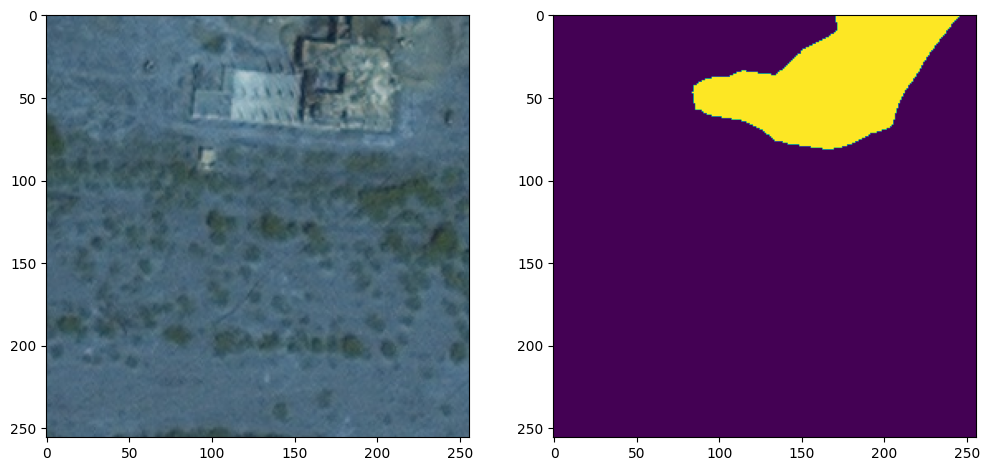

In [20]:
image_number = random.randint(0, len(images_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(images_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:, :, 0])
plt.show()

In [21]:
labels_cat = to_categorical(labels, num_classes = 7)
labels_cat

array([[[[0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [23]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [24]:
print(IMG_HEIGHT)
print(IMG_WIDTH)
print(IMG_CHANNELS)

256
256
3


In [25]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [26]:
def multi_unet_model(n_classes=7, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=3):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [27]:
metrics=['accuracy', jacard_coef]

In [28]:
model = multi_unet_model(n_classes=7, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [30]:
history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/50
45/45 [==============================] - 265s 6s/step - loss: 6.2062 - accuracy: 0.2090 - jacard_coef: 0.0883 - val_loss: 1.9204 - val_accuracy: 0.2095 - val_jacard_coef: 0.0791
Epoch 2/50
45/45 [==============================] - 255s 6s/step - loss: 1.9250 - accuracy: 0.2366 - jacard_coef: 0.0802 - val_loss: 1.8964 - val_accuracy: 0.3217 - val_jacard_coef: 0.0812
Epoch 3/50
45/45 [==============================] - 259s 6s/step - loss: 1.8884 - accuracy: 0.3028 - jacard_coef: 0.0821 - val_loss: 1.8757 - val_accuracy: 0.3217 - val_jacard_coef: 0.0831
Epoch 4/50
45/45 [==============================] - 278s 6s/step - loss: 1.8682 - accuracy: 0.3029 - jacard_coef: 0.0839 - val_loss: 1.8571 - val_accuracy: 0.3217 - val_jacard_coef: 0.0848
Epoch 5/50
45/45 [==============================] - 273s 6s/step - loss: 1.8502 - accuracy: 0.3029 - jacard_coef: 0.0856 - val_loss: 1.8400 - val_accuracy: 0.3217 - val_jacard_coef: 0.0865
Epoch 6/50
45/45 [==============================] - 277

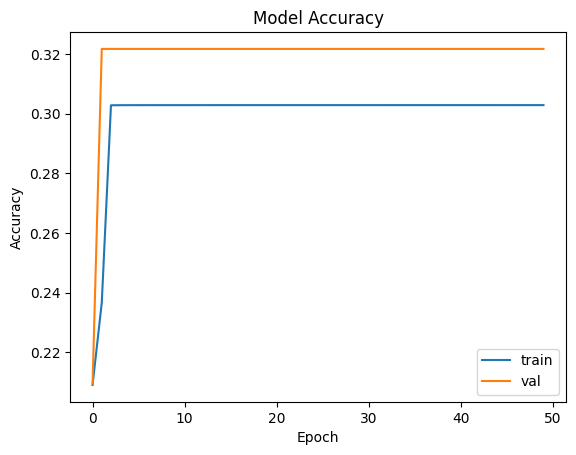

In [33]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

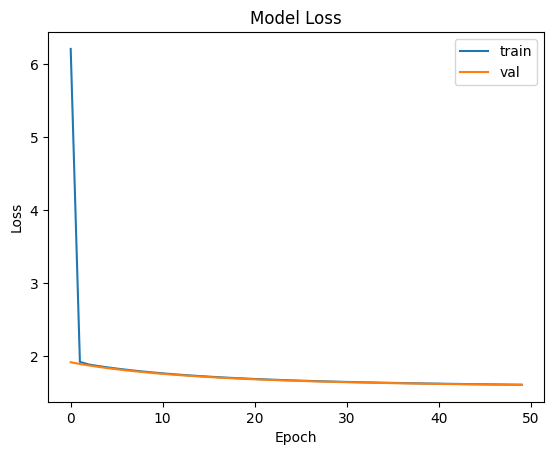

<Figure size 2200x2200 with 0 Axes>

In [40]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.figure(figsize=(22,22))
plt.show()

In [36]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

6/6 [==============================] - 6s 915ms/step


1/1 [==============================] - 0s 74ms/step


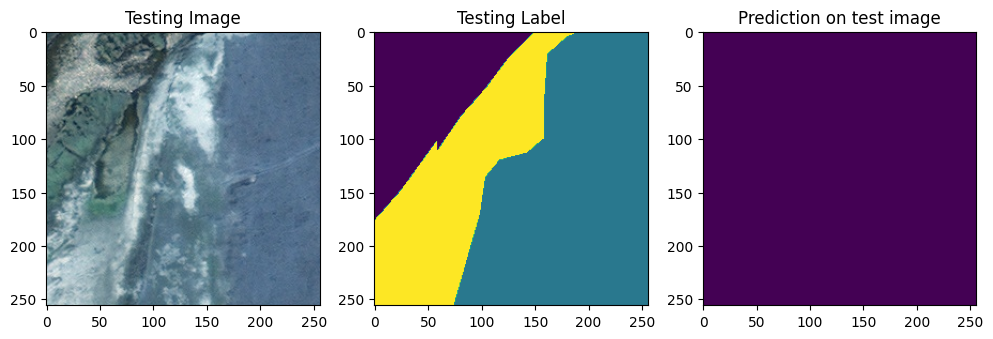

In [52]:
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()